In [ ]:
# pip3 install opencv-python (python3, windows)


# Packages

In [5]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Imsge

In [6]:
# # TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras

# # Helper libraries

In [7]:
import dlib
from skimage import io


# Funcitons


In [4]:
##load matlab file to python 
# import scipy.io
# mat = scipy.io.loadmat('./train_set/train_set/points/0001.mat')

In [51]:
def landmark(img):
    """
     Input
    -----
        img: a cv2.imread(file) or other cv2 picture file
    Return
    ------
        a lot of thing, including a landmark picture"""
    
    
    detector = dlib.get_frontal_face_detector()
    # dlib 68 points landmark detection 
    predictor = dlib.shape_predictor("C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat")
    # path of picture file
    img=cv2.imread(file)
    
    #img = io.imread("2.jpg")
    # produce dlib window
    win = dlib.image_window()
    win.clear_overlay()
    win.set_image(img)

    dets = detector(img, 1)
    print("number of people's face：", len(dets))

    for k, d in enumerate(dets):

            print("The", k+1, "th face's location：",
                  "left:", d.left(),
                  "right:", d.right(),
                  "top:", d.top(),
                  "bottom:", d.bottom())

            width = d.right() - d.left()
            heigth = d.bottom() - d.top()

            print('face area：',(width*heigth))
    
            shape = predictor(img, d)
            # label the 68n points and plot them
            for i in range(68):
                cv2.circle(img, (shape.part(i).x, shape.part(i).y), 4, (0, 255, 0), -1, 8)
                cv2.putText(img, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
            # show the window and remove.
            cv2.imshow('face', img)
            cv2.waitKey(0)

In [52]:
def list_indx_emotion(emotion_type,label_data):
    """get a list of index of pictures in data, that labeled by given 
    Input
    ————
        emotion_type:str of what emotion want to filter
        label_data: dataframe of dataset
    Return
    --------
        list of picture's index by given emotion_type for given data"""
    df_emotion_type =  label_data[label_data['emotion_cat'] == emotion_type]
    if len(list(df_emotion_type['Index'])) == len(list(set(df_emotion_type['Index']))):
        return list(df_emotion_type['Index'])
    else:
        print ("something wrong,pls check",emotion_type,' in ',label_data)

In [53]:
def file_list(list_index):
    """return a list of str that match the file name of data
    Input
    -----
        list_index: a list of index, all int
    Return
    -----
        a list of str that has .jpg format"""
    list_file_name = []
    for index in list_index: 
        list_file_name.append(str(index).zfill(4)  + '.jpg')
    return list_file_name

In [54]:
import os
import fnmatch
##read every jpg file in the folder given file str name
def find_files(directory, pattern):
    """Method to find target files in one directory, including subdirectory
    Input
    -----
        directory: path
        pattern: filter pattern
    Return
    ------
         target file path
    """
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename
# for filename in find_files('./train_set/train_set/images', '0002.jpg'):
#     img = cv2.imread(filename, 0)

In [10]:
# #another way to reada all the jpg file in the reader
# import glob
# PATH = ''
# for file in glob.glob('./train_set/train_set/images' + '*.jpg'):
#     img = cv2.imread(file, -1)

In [14]:
def nested_array_cordinates(img):
    """get a netsed array for 68 cordinates of landmark by given img"""
    predictor_path = "C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    dets = detector(img)

    #output face landmark points inside retangle
    #shape is points datatype

    for k, d in enumerate(dets):
        shape = predictor(img, d)

    vec = np.empty([68, 2], dtype = int)
    for b in range(68):
        vec[b][0] = shape.part(b).x
        vec[b][1] = shape.part(b).y
    return vec

In [55]:
def numpy_pixels(img):

    #img = cv2.imread(filename, 0)
    val = [val for sublist in img for val in sublist]
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    return x_pixels

In [56]:
def show_image_and_label(x):
    x_reshaped = x.reshape(750,1000)
    plt.imshow(x_reshaped, cmap= "gray",
              interpolation="nearest")
    plt.axis("off")
    plt.show()

In [ ]:
def facial_detection(img):
    """return a croped front face image file"""
    #img=cv2.imread('./train_set/train_set/images/0001.jpg',0)
    faceCascade = cv2.CascadeClassifier('C:/Users/BurningBamboo/Desktop/ADS_proj3/haarcase/haarcascade_frontalface_default.xml')
    # Detect faces
    faces = faceCascade.detectMultiScale(
    img,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
    )# For each face
    for (x, y, w, h) in faces: 
        # Draw rectangle around the face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
        #print (x, y, w+x, h+y)
#         plt.figure(figsize=(12,8))
#         plt.imshow(img, cmap='gray')
#         plt.show()
        return img[y:y+h, x:x+w]

In [ ]:
from math import hypot

def distances(p1,p2):
    """Euclidean distance between two points."""
    x1,y1 = p1
    x2,y2 = p2
    return hypot(x2 - x1, y2 - y1)

from itertools import combinations

array_cordinate_test = nested_array_cordinates(img_001_gray)

list_of_coords = np.array(array_cordinate_test).tolist()

list_distance = [distances(*combo) for combo in combinations(list_of_coords,2)]


In [ ]:
def nested_list_distances(path_images,file_full_name_list):
    nested_list = []
    for img in file_full_name_list:
        for filename in find_files(path_images, img):
            img_gray = cv2.imread(filename, 0)
            
            array_cordinate_test = nested_array_cordinates(img_gray)

            list_of_coords = np.array(array_cordinate_test).tolist()

            list_distance = [distances(*combo) for combo in combinations(list_of_coords,2)]
            nested_list.append(list_distance)
    return nested_list


In [ ]:
def df_features_68(path,list_str_file):
    """return a df of features that like the one prof given
    Input
    -----
        path: path of data folder
        list_str_file: a list of str, the name of file
    Return
    ----
        a df, only Xs"""
    nested_list =  nested_list_distances(path,list_str_file)
    df_distances_features = pd.DataFrame(data=nested_list)
    return df_distances_features

In [ ]:
def df_deatures_68_y(path,list_int_file):
    """main for create df of 68 points distances and emotion_idx df
    Input
    ----
        path:path of image file
        list_int_file: a list of int that contain the data index
    Return
    -----
        df of 68*67/2 xs features and relative emotion_index"""
    list_str_file = file_list(list_int_file)
    df_Xs = df_features_68(path,list_str_file)
    label_sub = label[label['Index'].isin(list_int_file)]
    y = list(label_sub['emotion_idx'])
    dataframe_combine = df_Xs.copy()
    dataframe_combine['emotion_index'] = y
    return dataframe_combine
    

# Data

In [14]:
label = pd.read_csv(r'C:\Users\BurningBamboo\Desktop\ADS_proj3\train_set\train_set\label.csv')
# label_training = pd.read_csv('label_training_2000.csv')
# label_test = pd.read_csv('label_test_500.csv')

In [16]:
label.head(2)

,Unnamed: 0,Index,identity,emotion_idx,emotion_cat,type
0,1,1,111,1,Neutral,simple
1,2,2,114,1,Neutral,simple


In [11]:
dat_train = pd.read_csv('../output/dat_train.csv')

In [42]:
dat_test = pd.read_csv('../output/dat_test.csv')
dat_test_Xs = dat_test.as_matrix(columns=dat_test.columns[1:-1])
dat_test_y = dat_test['emotion_idx'].to_numpy()

c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [29]:
dat_train_Xs = dat_train.as_matrix(columns=dat_train.columns[1:-1])


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 39,  19,   2, ...,  50, 100,  50],
       [ 30,  17,   5, ...,  57, 109,  52],
       [ 30,  14,   1, ...,  47,  87,  40],
       ...,
       [ 33,  18,   2, ...,  58, 116,  58],
       [ 33,  18,   1, ...,  49,  97,  48],
       [ 33,  20,   1, ...,  56, 111,  55]], dtype=int64)

In [36]:
dat_train_y = dat_train['emotion_idx'].to_numpy()

In [10]:
emotion_cat = list(set(label_training['emotion_cat']))

In [11]:
list_suprised = list_indx_emotion('Surprised',label_training)
suprised_file = file_list(list_suprised)

NameError: name 'list_indx_emotion' is not defined

In [12]:
suprised_file = file_list(list_suprised)

NameError: name 'file_list' is not defined

In [13]:
for filename in find_files('./train_set/train_set/images', suprised_file[3]):
    img_raw = cv2.imread(filename)

# Scratch works and test

In [38]:
from sklearn.ensemble import AdaBoostClassifier # 分类任务
from sklearn.ensemble import AdaBoostRegressor  # 回归任务
from sklearn.tree import DecisionTreeClassifier
 
base_estimator = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=50, base_estimator=base_estimator, learning_rate=1)
# 使用决策树作为基分类器
clf.fit(dat_train_Xs, dat_train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

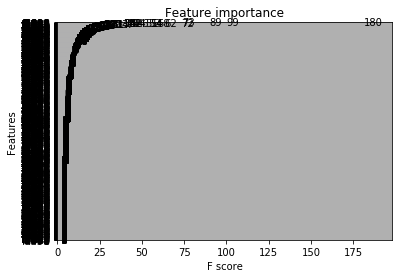

In [40]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(dat_train_Xs, dat_train_y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [50]:
y_pre = model.predict(dat_test_Xs)
y_pro = model.predict_proba(dat_test_Xs)
#print ("AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro))
#print("Accuracy : %.4g" % metrics.accuracy_score(test_label, y_pre))
print (model) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#landmark(facial_detection(img_001_gray))

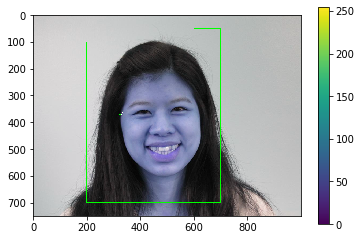

In [30]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
landmark('./train_set/train_set/images/0201.jpg')

number of people's face： 1
The 1 th face's location： left: 312 right: 633 top: 277 bottom: 598
face area： 103041


In [13]:

# image = cv2.imread(faces_folder_path+'/'+filename)
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# dets = detector(gray_image, 1)

In [42]:
detector = dlib.get_frontal_face_detector()
#cv2.imshow('test',img)
img_001=cv2.imread('./train_set/train_set/images/0001.jpg')
img_001_gray = cv2.cvtColor(img_001, cv2.COLOR_BGR2GRAY)

#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dets = detector(img_001_gray, 1)
predictor = dlib.shape_predictor("C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat")
shape = predictor(img_001_gray, dets[0])

In [45]:
for k,d in enumerate(dets):
    print(k,d)

0 [(332, 247) (718, 632)]


In [ ]:
cv2.rectangle(img, (247, 332), (632, 718), (0, 255, 0), 2)
plt.imshow(img)

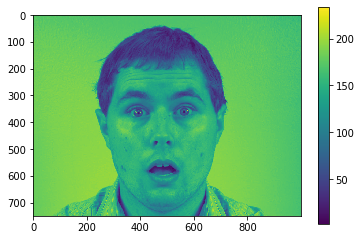

In [25]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# model = tf.keras.models.load_model('./model_v6_23.hdf5')
# predicted_class = np.argmax(model.predict(img_001_d))

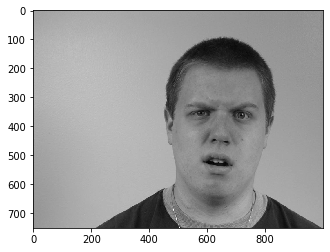

In [101]:
plt.imshow(img, cmap='gray')
plt.show()

In [16]:
##code for split the data into training and test data (run once and pickle the file)
import numpy
# x is the dataset's index
x =  np.asarray(list(label['Index']), dtype=np.int)
training_idx = numpy.random.randint(x.shape[0], size=2000)
test_idx = numpy.random.randint(x.shape[0], size=500)
training, test = x[training_idx,], x[test_idx,]

In [20]:
training

array([1271, 1176, 1578, ..., 1870, 1425, 2025])

In [ ]:
label_training = label[label['Index'].isin(training)]

In [17]:
label_training = label[label['Index'].isin(training)]
label_test = label[~label['Index'].isin(training)]

In [18]:
len(label_training)

1368

In [79]:
#label_training['emotion_cat'].hist()

In [80]:
#label_test['emotion_cat'].hist()

In [36]:
list_suprised = list_indx_emotion('Surprised',label_training)

In [6]:
simple = label[label['type']== 'simple']
compound = label[label['type']== 'compound']

In [112]:
traning_index = list(label_training['Index'])

In [124]:
traning_file_name = []
for num in traning_index: 
    traning_file_name.append(str(num).zfill(4)  + '.jpg')

In [21]:
#cv2.imshow('test',img)
img_001=cv2.imread('./train_set/train_set/images/0001.jpg',0)
#img_001_gray = cv2.cvtColor(img_001, cv2.COLOR_BGR2GRAY)

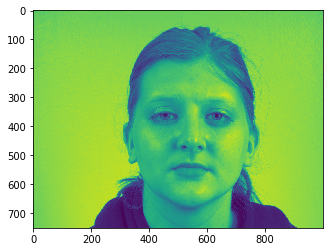

In [49]:
plt.imshow(img_001)
plt.show()

In [25]:
import numpy as np
image = '1 2 3 4 5 6'
image_width, image_height = 2, 3
result = np.fromstring(image, dtype=int, sep=" ").reshape((image_height, image_width))

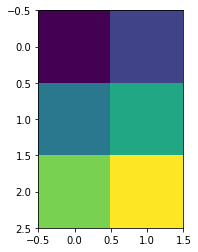

In [29]:
plt.imshow(result)
plt.show()

In [50]:
win = dlib.image_window()
win.clear_overlay()
win.set_image(img_001)

None


In [87]:
img_001.shape

(750, 1000)